Preview of the data:

In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from io import StringIO

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df = df['Position'].value_counts().sort_index()

In [5]:
dft = pd.DataFrame(data=df)

In [6]:
df_trans = dft.T

In [7]:
df_trans

,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Position,958,1778,948,74,1394,2025,21,1322,648,395,...,1291,662,391,248,16,1124,203,370,87,2152


In [8]:
Attacker = df_trans.drop(['GK','LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM'], axis=1)
Defender = df_trans.drop(['GK','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW'], axis=1)
Midfielder = df_trans.drop(['GK','LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW'], axis=1)
Goalkeeper = df_trans.drop(['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW'], axis=1)

In [9]:
Attacker['Attacker'] = Attacker.sum(axis=1)
Defender['Defender']= Defender.sum(axis=1)
Midfielder['Midfielder'] = Midfielder.sum(axis=1)
Goalkeeper['Goalkeeper'] = Goalkeeper.sum(axis=1)

In [10]:
Attacker = Attacker.drop(['ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LS'], axis=1)
Midfielder = Midfielder.drop(['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM'], axis=1)
Defender = Defender.drop(['RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','LWB'], axis=1)
Goalkeeper = Goalkeeper.drop(['GK'], axis=1)

In [11]:
Position = pd.concat([Attacker,Midfielder,Defender,Goalkeeper], axis=1)

In [12]:
Position

,Attacker,Midfielder,Defender,Goalkeeper
Position,3418,6838,5866,2025


In [13]:
PT = Position.T

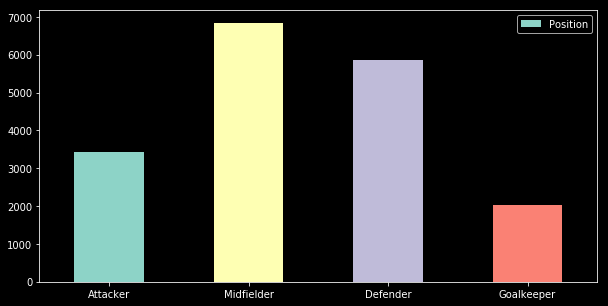

In [15]:
plt.style.use('dark_background')

PT.plot(kind='bar', figsize=(10,5),y='Position',rot=0)
